# Using Databases

Here is some information about the role of databases in larger projects

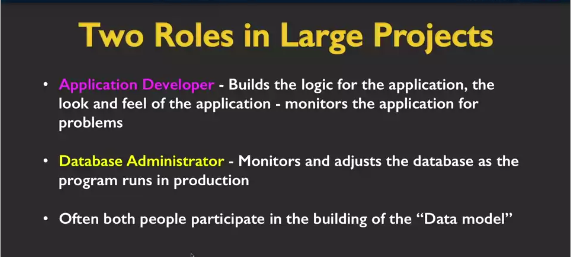

Here is flow diagram of a large project layout (Tech Company style)

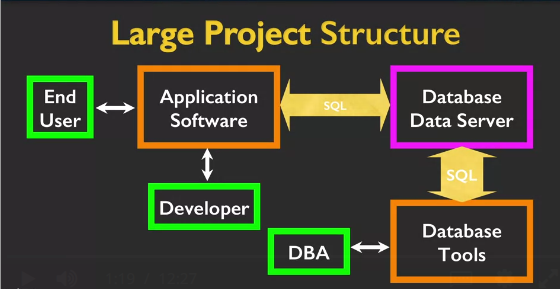

Here is the definition of a Database Administrator

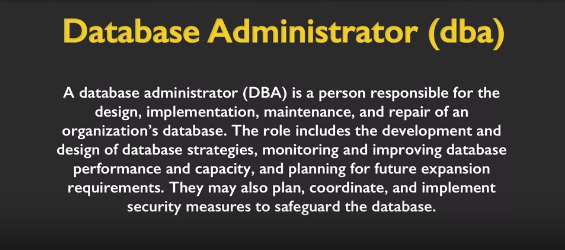

Data analysis structure (Flow Chart)

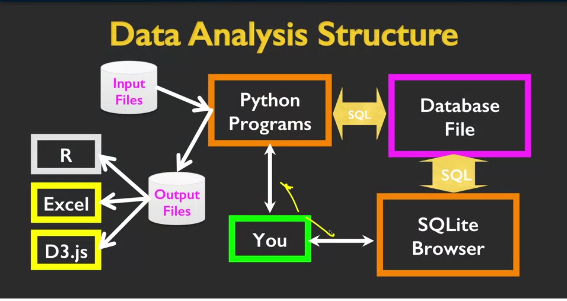

Definition of Database Model

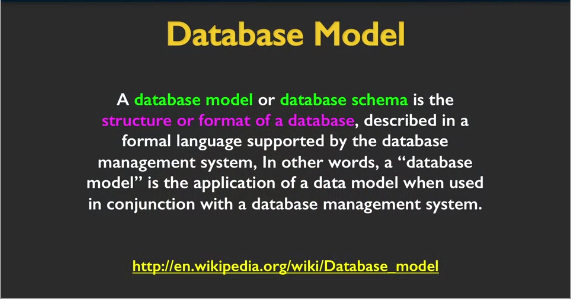

Common Database Systems that use SQL

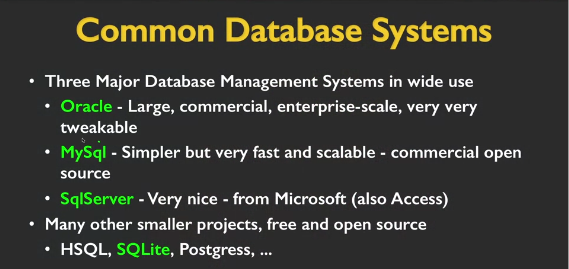

# Relational Databases Basics

Database Termonology

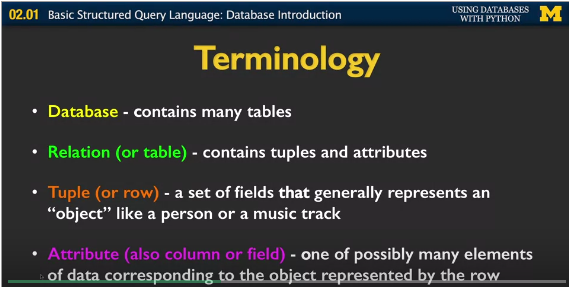

More details about a relation (table)

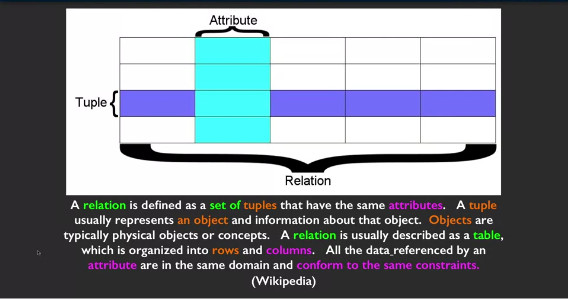

Some basic info about SQL 

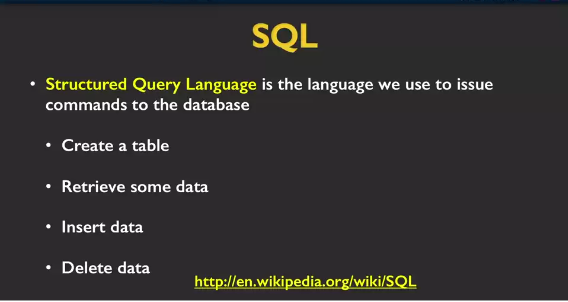

The acronym crud (CREATE, RETRIEVE, UPDATE, DELETE) data from a database, This is what SQL allows us to do. 

# Single Table CRUD Notes

Basic CREATE TABLE code
* Table name here in this example is "Users" with Fields "name", "email"

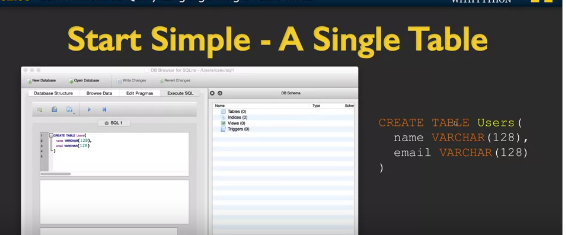

Using INSERT statement

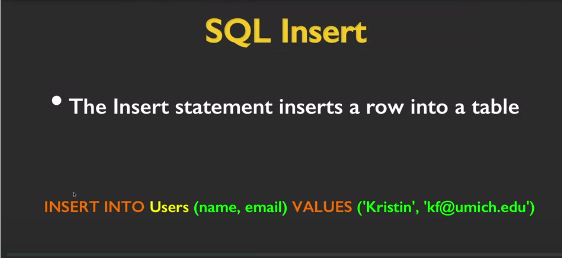

DELETING a row using SQL

In [4]:
"INSERT INTO table(var1, var2) VALUES ('data1','data2')"

"INSERT INTO table(var1, var2) VALUES ('data1','data2')"

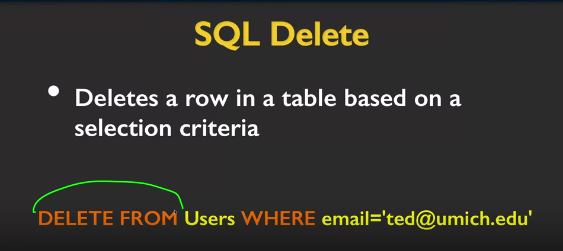

Running the UPDATE command

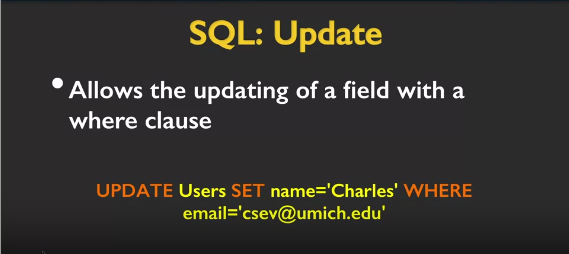

Retrieving records from a table

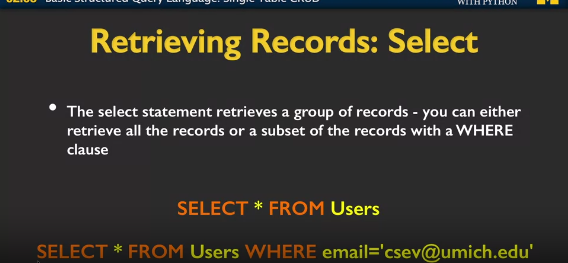

You can also use an order by to select Users by order

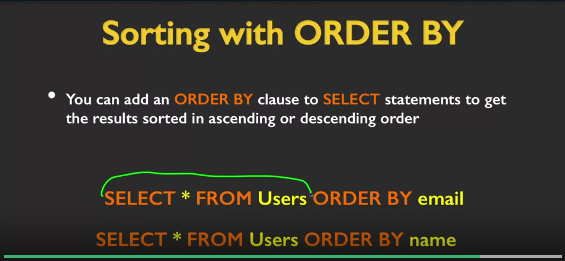

Here is a quick summary of all the codes from above

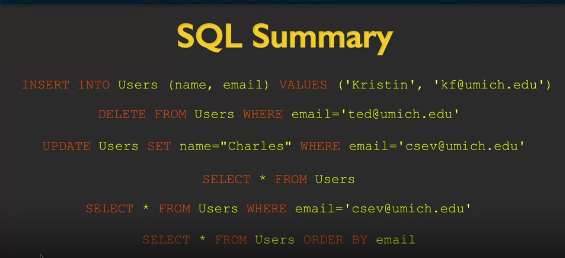

# Counting Emails with Databases

In [5]:
# Import package
import sqlite3

In [6]:
# Create connection 
conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

In [7]:
# drop existing table
cur.execute('DROP TABLE IF EXISTS Counts')

In [8]:
# create table with two columns "email" and "count"
cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

In [9]:
fname = open("mbox-short.txt")

In [10]:
## for loop to add data into the database
for line in fname:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    cur.execute('SELECT count FROM Counts WHERE email = ?', (email,)) # pulls from the email variable
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (?, 1)''', (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?', (email,))
    conn.commit()

In [11]:
# creates the database query
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

# pulls the data from the database and prints it out
for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


# Example Database Program

In [12]:
## code that reads file and outputs it into sqlite database
# import library
import sqlite3

# create 'bridge' to database
bridge = sqlite3.connect('Assignment_database.sqlite')
current_tab = bridge.cursor()

# code to drop existing sql relation
current_tab.execute('DROP TABLE IF EXISTS Counts')

current_tab.execute('''
CREATE TABLE Counts (org VARCHAR, count INTEGER)''')

hand = open("mbox.txt")

for line in hand:
    if not line.startswith('From: '): continue
    email_lines = line.split()
    email = email_lines[1]
    current_tab.execute('SELECT count FROM Counts WHERE org = ? ', (email,))
    row = current_tab.fetchone()
    if row is None:
        current_tab.execute('''INSERT INTO Counts (org, count)
                VALUES (?, 1)''', (email,))
    else:
        current_tab.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',
                    (email,))
    bridge.commit()

sqlstr = 'SELECT org, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in current_tab.execute(sqlstr):
    print(str(row[0]), row[1])

current_tab.close()


zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67
